In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prometeo23-pre-event-ml/sample_submission.csv
/kaggle/input/prometeo23-pre-event-ml/train.csv
/kaggle/input/prometeo23-pre-event-ml/test.csv


In [2]:
train_loc='/kaggle/input/prometeo23-pre-event-ml/train.csv'
train_data=pd.read_csv(train_loc)
train_data.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767,label
0,55.391998,402.842010,1179.939941,137.306000,275.936005,-668.432983,738.448975,509.286987,413.082001,-1350.576050,...,-697.203979,-219.283005,225.966003,-43.695000,626.716980,-295.596985,-635.940979,31.915001,158.291000,4
1,498.306000,118.342003,1222.817993,646.617004,746.257019,-473.803986,-11.617000,-16.693001,269.397003,-613.716003,...,-288.542999,-441.739990,-406.356995,174.936996,532.174011,-443.278992,-68.603996,-493.657013,-368.730011,1
2,1465.275024,-2211.415039,2463.522949,945.344971,922.330994,338.187988,-1548.826050,-818.586975,-1007.841003,79.605003,...,-507.450012,1626.469971,-1210.922974,4531.459961,-2801.270020,2071.193115,-99.113998,-475.681000,2455.382080,3
3,-480.721008,-200.492996,994.544983,429.501007,603.341980,335.571991,-789.293030,315.600006,79.110001,-700.228027,...,190.117996,-141.376999,-158.606995,789.737000,-157.804993,-241.746994,-488.445007,209.561005,-415.536987,4
4,259.115997,-71.842003,489.447998,23.549999,543.088989,-119.539001,-93.567001,55.488998,-235.072998,-773.299011,...,225.546005,-258.687988,-591.017029,359.621002,316.252014,-309.529999,200.304993,-167.130005,44.182999,4


importing test data

In [3]:
test_loc='/kaggle/input/prometeo23-pre-event-ml/test.csv'
test_data=pd.read_csv(test_loc)
test_data.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_758,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767
0,-588.812012,-16.459999,585.155029,407.606995,-10.286000,-84.586998,404.765991,271.266998,499.578003,-1278.270020,...,-661.101013,-581.062012,-915.862000,-15.428000,-123.609001,-44.327000,607.567017,-1553.897949,-312.118011,-1065.124023
1,2494.957031,-202.628998,2453.219971,180.735992,329.468994,250.464996,1946.031006,3399.147949,441.165985,-817.734985,...,252.505997,-1641.519043,-1040.286011,723.328979,1057.093994,-892.531006,-215.003006,1309.060059,-575.366028,-1667.469971
2,9.581000,-917.840027,707.869995,205.690994,767.721985,-133.733002,316.574005,187.778000,-874.216980,-273.199005,...,-113.867996,-285.209015,299.352997,-333.828003,98.253998,231.095993,162.904007,-453.291992,-38.993999,100.320999
3,528.770996,-4.656000,779.922974,176.306000,295.033997,-474.942993,443.114014,295.628998,219.356995,-855.742004,...,388.722992,-406.528992,-317.867004,51.375999,436.625000,233.684006,-644.229004,-416.923004,-410.556000,516.400024
4,4105.824219,1456.322998,3224.325928,1181.749023,3312.511963,2905.216064,705.135010,3758.070068,-1874.987061,-3637.200928,...,1427.248047,-2808.204102,-1510.807007,-170.334000,3416.754883,-2807.773926,-968.242004,-3440.810059,794.588989,-461.559998


checking the shape/no of features of the training data

In [4]:
train_data.shape

(36455, 769)

In [5]:
train_data.columns

Index(['f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9',
       ...
       'f_759', 'f_760', 'f_761', 'f_762', 'f_763', 'f_764', 'f_765', 'f_766',
       'f_767', 'label'],
      dtype='object', length=769)

checking for null values

In [6]:
train_data.isna().sum().sum()

0

splitting into input and target features

In [7]:
X=train_data.iloc[:,0:-1]
y=train_data.iloc[:,-1]

In [8]:
X.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_758,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767
0,55.391998,402.842010,1179.939941,137.306000,275.936005,-668.432983,738.448975,509.286987,413.082001,-1350.576050,...,225.628006,-697.203979,-219.283005,225.966003,-43.695000,626.716980,-295.596985,-635.940979,31.915001,158.291000
1,498.306000,118.342003,1222.817993,646.617004,746.257019,-473.803986,-11.617000,-16.693001,269.397003,-613.716003,...,668.473999,-288.542999,-441.739990,-406.356995,174.936996,532.174011,-443.278992,-68.603996,-493.657013,-368.730011
2,1465.275024,-2211.415039,2463.522949,945.344971,922.330994,338.187988,-1548.826050,-818.586975,-1007.841003,79.605003,...,868.348022,-507.450012,1626.469971,-1210.922974,4531.459961,-2801.270020,2071.193115,-99.113998,-475.681000,2455.382080
3,-480.721008,-200.492996,994.544983,429.501007,603.341980,335.571991,-789.293030,315.600006,79.110001,-700.228027,...,93.406998,190.117996,-141.376999,-158.606995,789.737000,-157.804993,-241.746994,-488.445007,209.561005,-415.536987
4,259.115997,-71.842003,489.447998,23.549999,543.088989,-119.539001,-93.567001,55.488998,-235.072998,-773.299011,...,-150.707001,225.546005,-258.687988,-591.017029,359.621002,316.252014,-309.529999,200.304993,-167.130005,44.182999


In [9]:
y.head()

0    4
1    1
2    3
3    4
4    4
Name: label, dtype: int64

saving test data

In [10]:
X_test=test_data.copy()
X_test.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_758,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767
0,-588.812012,-16.459999,585.155029,407.606995,-10.286000,-84.586998,404.765991,271.266998,499.578003,-1278.270020,...,-661.101013,-581.062012,-915.862000,-15.428000,-123.609001,-44.327000,607.567017,-1553.897949,-312.118011,-1065.124023
1,2494.957031,-202.628998,2453.219971,180.735992,329.468994,250.464996,1946.031006,3399.147949,441.165985,-817.734985,...,252.505997,-1641.519043,-1040.286011,723.328979,1057.093994,-892.531006,-215.003006,1309.060059,-575.366028,-1667.469971
2,9.581000,-917.840027,707.869995,205.690994,767.721985,-133.733002,316.574005,187.778000,-874.216980,-273.199005,...,-113.867996,-285.209015,299.352997,-333.828003,98.253998,231.095993,162.904007,-453.291992,-38.993999,100.320999
3,528.770996,-4.656000,779.922974,176.306000,295.033997,-474.942993,443.114014,295.628998,219.356995,-855.742004,...,388.722992,-406.528992,-317.867004,51.375999,436.625000,233.684006,-644.229004,-416.923004,-410.556000,516.400024
4,4105.824219,1456.322998,3224.325928,1181.749023,3312.511963,2905.216064,705.135010,3758.070068,-1874.987061,-3637.200928,...,1427.248047,-2808.204102,-1510.807007,-170.334000,3416.754883,-2807.773926,-968.242004,-3440.810059,794.588989,-461.559998


scaling the data using MinMaxScaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
X_test=scaler.transform(X_test)
print(X)

[[0.60023851 0.6267913  0.34201027 ... 0.44135792 0.3651723  0.43490345]
 [0.61227908 0.6160183  0.34315086 ... 0.45996804 0.35084152 0.41276741]
 [0.63856604 0.52779873 0.37615464 ... 0.45896723 0.35133167 0.53138631]
 ...
 [0.57419148 0.57496719 0.33319375 ... 0.44225366 0.35429832 0.4917535 ]
 [0.61858791 0.60263183 0.34939503 ... 0.45034944 0.36486762 0.42921954]
 [0.61992736 0.58253366 0.37855084 ... 0.43893653 0.34968109 0.43360033]]


time to use PCA to analyse the variance. For this notebook we will use PCA without SMOTE

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)

PCA()

We have successfully fitted the PCA on all independent variables. Let’s now extract explained_variance and explained_varience_ratio which are ordered lists starting from most significant features to least.

In [13]:
# features sorted based on eigenvalues
pca.explained_variance_  

array([1.61711301e-01, 3.94044511e-02, 3.37128457e-02, 2.69662614e-02,
       2.27519835e-02, 2.08753645e-02, 1.47752993e-02, 1.40678251e-02,
       1.22281425e-02, 1.08946859e-02, 9.54842304e-03, 9.10890526e-03,
       8.14469938e-03, 7.79912082e-03, 7.49290945e-03, 6.91114886e-03,
       6.59726728e-03, 6.39416279e-03, 6.06945384e-03, 5.74554705e-03,
       5.38793033e-03, 5.08605526e-03, 4.87173554e-03, 4.78257612e-03,
       4.57746964e-03, 4.47799117e-03, 4.37239190e-03, 4.13437571e-03,
       4.00573072e-03, 3.99964821e-03, 3.83969357e-03, 3.74530360e-03,
       3.62707860e-03, 3.40625790e-03, 3.27246338e-03, 3.12685638e-03,
       3.10065593e-03, 2.98461249e-03, 2.92768267e-03, 2.89282828e-03,
       2.74079129e-03, 2.62024412e-03, 2.58034529e-03, 2.53829474e-03,
       2.47675708e-03, 2.45070529e-03, 2.40415668e-03, 2.32572198e-03,
       2.27361753e-03, 2.25384213e-03, 2.17924706e-03, 2.11535004e-03,
       2.10348950e-03, 2.07497960e-03, 2.00185315e-03, 1.97767165e-03,
      

now lets find the percentage

In [14]:
# Percentage contribution of each feature
pca.explained_variance_ratio_

array([2.22210941e-01, 5.41464951e-02, 4.63255389e-02, 3.70549138e-02,
       3.12639849e-02, 2.86852828e-02, 2.03030532e-02, 1.93308980e-02,
       1.68029509e-02, 1.49706197e-02, 1.31206913e-02, 1.25167406e-02,
       1.11918048e-02, 1.07169379e-02, 1.02961664e-02, 9.49675676e-03,
       9.06544540e-03, 8.78635519e-03, 8.34016571e-03, 7.89507850e-03,
       7.40366976e-03, 6.98885679e-03, 6.69435551e-03, 6.57183965e-03,
       6.28999847e-03, 6.15330298e-03, 6.00819678e-03, 5.68113367e-03,
       5.50435984e-03, 5.49600174e-03, 5.27620467e-03, 5.14650139e-03,
       4.98404591e-03, 4.68061149e-03, 4.49676159e-03, 4.29667992e-03,
       4.26067731e-03, 4.10121956e-03, 4.02299108e-03, 3.97509692e-03,
       3.76617965e-03, 3.60053322e-03, 3.54570738e-03, 3.48792484e-03,
       3.40336463e-03, 3.36756630e-03, 3.30360287e-03, 3.19582407e-03,
       3.12422625e-03, 3.09705244e-03, 2.99454978e-03, 2.90674752e-03,
       2.89044969e-03, 2.85127363e-03, 2.75078902e-03, 2.71756071e-03,
      

finding the best cumulative sum of features to use

Text(0.5, 1.0, 'Scree plot')

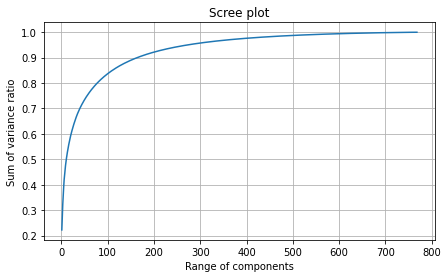

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,4))
plt.plot(range(1,769,1),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Sum of variance ratio')
plt.xlabel('Range of components')
plt.grid()
plt.title('Scree plot')


trying to find Range of Comp. at 0.98 variance

In [16]:
x_value = np.interp(0.98,np.cumsum(pca.explained_variance_ratio_), np.arange(1,769,1))
print(x_value)

427.60462487864226


therefore 427 is the number of features/ or the optimal components with 98 percent variance

In [17]:
pca=PCA(n_components=427)
pca.fit(X)

PCA(n_components=427)

now let us see the cumulative ratio or percentage of these 427 features

In [18]:
pca.explained_variance_ratio_.cumsum()

array([0.22221094, 0.27635744, 0.32268297, 0.35973789, 0.39100187,
       0.41968716, 0.43999021, 0.45932111, 0.47612406, 0.49109468,
       0.50421537, 0.51673211, 0.52792391, 0.53864085, 0.54893702,
       0.55843378, 0.56749922, 0.57628558, 0.58462574, 0.59252082,
       0.59992449, 0.60691335, 0.6136077 , 0.62017954, 0.62646954,
       0.63262284, 0.63863104, 0.64431217, 0.64981653, 0.65531254,
       0.66058874, 0.66573524, 0.67071929, 0.6753999 , 0.67989666,
       0.68419334, 0.68845402, 0.69255524, 0.69657823, 0.70055333,
       0.70431951, 0.70792004, 0.71146575, 0.71495367, 0.71835704,
       0.7217246 , 0.7250282 , 0.72822403, 0.73134826, 0.73444531,
       0.73743986, 0.7403466 , 0.74323705, 0.74608833, 0.74883912,
       0.75155668, 0.75425708, 0.7568636 , 0.75943012, 0.76198066,
       0.76450029, 0.76694947, 0.76933686, 0.77172139, 0.77405992,
       0.77632148, 0.77856972, 0.78080274, 0.78300135, 0.78517363,
       0.78728297, 0.78936022, 0.79142261, 0.79346005, 0.79544

using SMOTE to check distribution of classes in training datset

In [19]:
# Counting the labels before resampling
print("Before SMOTE, counts of label '0': {}".format(sum(y==0)))
print("Before SMOTE, counts of label '1': {}".format(sum(y==1)))
print("Before SMOTE, counts of label '2': {}".format(sum(y==2)))
print("Before SMOTE, counts of label '3': {}".format(sum(y==3)))
print("Before SMOTE, counts of label '4': {}".format(sum(y==4)))

Before SMOTE, counts of label '0': 4925
Before SMOTE, counts of label '1': 5857
Before SMOTE, counts of label '2': 8886
Before SMOTE, counts of label '3': 6757
Before SMOTE, counts of label '4': 10030


Balancing the inequal multi class train numbers using SMOTE

In [20]:
# Using SMOTE resampling for balancing the class labels
from imblearn.over_sampling import SMOTE
smt = SMOTE(k_neighbors=5, random_state=42)
X_train_res, y_train_res = smt.fit_resample(X,y)

print('After SMOTE, the shape of train_X: {}'.format(X_train_res.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))
print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '2': {}".format(sum(y_train_res==2)))
print("After SMOTE, counts of label '3': {}".format(sum(y_train_res==3)))
print("After SMOTE, counts of label '4': {}".format(sum(y_train_res==4)))

After SMOTE, the shape of train_X: (50150, 768)
After SMOTE, the shape of train_y: (50150,) 

After SMOTE, counts of label '0': 10030
After SMOTE, counts of label '1': 10030
After SMOTE, counts of label '2': 10030
After SMOTE, counts of label '3': 10030
After SMOTE, counts of label '4': 10030


In [21]:
#from sklearn.ensemble import RandomForestClassifier
#model=RandomForestClassifier(n_estimators=250,max_depth=5,random_state=1)
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=1000,learning_rate=0.05)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X_train_res,y_train_res,test_size=0.20)

fitting the model to the dataset

In [23]:
model.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_valid, y_valid)])
# Making predictions with the trained model
y_pred = model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-mlogloss:1.59591
[1]	validation_0-mlogloss:1.58341
[2]	validation_0-mlogloss:1.57181
[3]	validation_0-mlogloss:1.56050
[4]	validation_0-mlogloss:1.54984
[5]	validation_0-mlogloss:1.53952
[6]	validation_0-mlogloss:1.52997
[7]	validation_0-mlogloss:1.52104
[8]	validation_0-mlogloss:1.51234
[9]	validation_0-mlogloss:1.50394
[10]	validation_0-mlogloss:1.49576
[11]	validation_0-mlogloss:1.48780
[12]	validation_0-mlogloss:1.48058
[13]	validation_0-mlogloss:1.47321
[14]	validation_0-mlogloss:1.46643
[15]	validation_0-mlogloss:1.45928
[16]	validation_0-mlogloss:1.45257
[17]	validation_0-mlogloss:1.44607
[18]	validation_0-mlogloss:1.44008
[19]	validation_0-mlogloss:1.43435
[20]	validation_0-mlogloss:1.42882
[21]	validation_0-mlogloss:1.42341
[22]	validation_0-mlogloss:1.41806
[23]	validation_0-mlogloss:1.41311
[24]	validation_0-mlogloss:1.40838
[25]	validation_0-mlogloss:1.40355
[26]	validation_0-mlogloss:1.39881
[27]	validation_0-mlogloss:1.39419
[28]	validation_0-mlogloss:1.3

time to submit predictions

In [24]:
output=pd.DataFrame({'Id':test_data.index,'Predicted':y_pred})
output.to_csv('submission.csv',index=False)
print("Submission saved!")

Submission saved!
